In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

In [2]:
# Load dataset
data = pd.read_csv(r"C:\Users\jigya\Downloads\Crop_recommendation 1.csv")
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
data.shape

(2200, 8)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [8]:
# Features and labels
X = data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = data['label']


In [9]:
# Encode crop labels
crop_dict = {
    'rice': 1, 'maize': 2, 'jute': 3, 'cotton': 4, 'coconut': 5, 'papaya': 6,
    'orange': 7, 'apple': 8, 'muskmelon': 9, 'watermelon': 10, 'grapes': 11,
    'mango': 12, 'banana': 13, 'pomegranate': 14, 'lentil': 15, 'blackgram': 16,
    'mungbean': 17, 'mothbeans': 18, 'pigeonpeas': 19, 'kidneybeans': 20,
    'chickpea': 21, 'coffee': 22
}

In [10]:
y_encoded = y.map(crop_dict)


In [11]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [12]:
# Apply scalers on training set
ms = MinMaxScaler()
X_train_minmax = ms.fit_transform(X_train)
X_test_minmax = ms.transform(X_test)


In [13]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train_minmax)
X_test_scaled = sc.transform(X_test_minmax)

In [14]:
# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [15]:
# Predict and evaluate
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)


In [16]:
print(f"✅ Accuracy of the Random Forest model: {accuracy:.2f}")
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))
print("📉 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

✅ Accuracy of the Random Forest model: 0.99

📊 Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.89      0.94        19
           2       1.00      1.00      1.00        21
           3       0.92      1.00      0.96        23
           4       1.00      1.00      1.00        17
           5       1.00      1.00      1.00        27
           6       1.00      1.00      1.00        23
           7       1.00      1.00      1.00        14
           8       1.00      1.00      1.00        23
           9       1.00      1.00      1.00        17
          10       1.00      1.00      1.00        19
          11       1.00      1.00      1.00        14
          12       1.00      1.00      1.00        19
          13       1.00      1.00      1.00        21
          14       1.00      1.00      1.00        23
          15       0.92      1.00      0.96        11
          16       1.00      1.00      1.00        20
          1

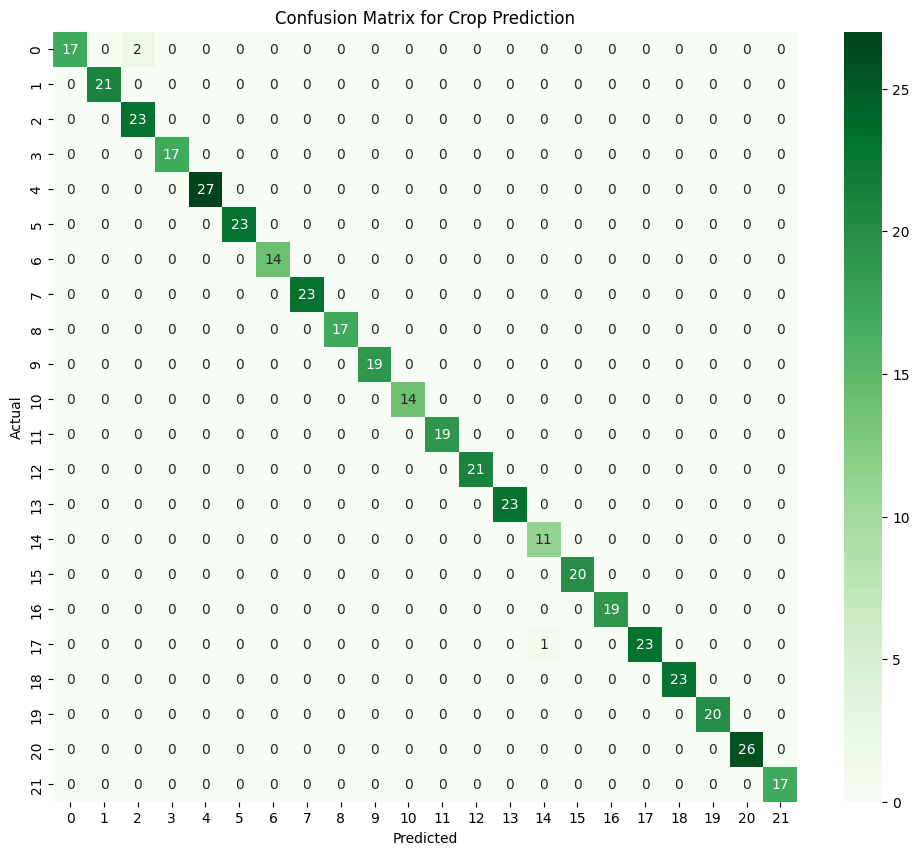

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix for Crop Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [18]:
from scipy.stats import ttest_ind

# Filter original labels
rice_n = data[data['label'] == 'rice']['N']
coffee_n = data[data['label'] == 'coffee']['N']

# Perform t-test
t_stat, p_value = ttest_ind(rice_n, coffee_n)

print("📊 T-Test Results (Nitrogen levels between Rice and coffee):")
print("T-statistic:", t_stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("✅ Significant difference in Nitrogen levels.")
else:
    print("❌ No significant difference in Nitrogen levels.")


📊 T-Test Results (Nitrogen levels between Rice and coffee):
T-statistic: -12.418905769803388
P-value: 1.4580911528012616e-26
✅ Significant difference in Nitrogen levels.



Cross-validation Accuracy: 0.9945


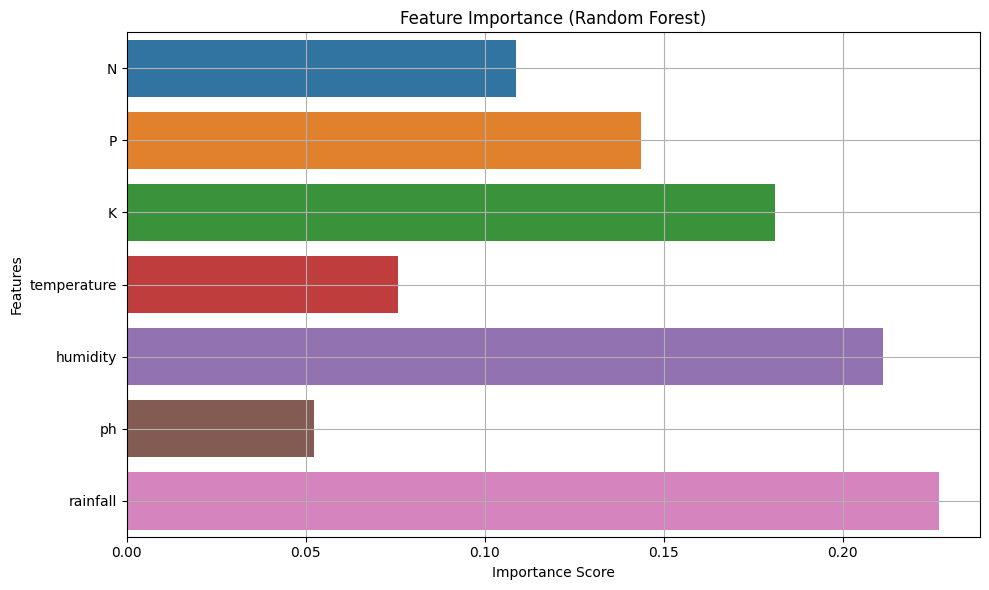

In [19]:
# Cross-validation Score
cv_scores = cross_val_score(model, X, y, cv=5)
print(f"\nCross-validation Accuracy: {cv_scores.mean():.4f}")

# Feature Importance Plot
feature_importance = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=features)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
# Save model and scalers
pickle.dump(model, open('mmmm.pkl', 'wb'))
pickle.dump(ms, open('mmss.pkl', 'wb'))
pickle.dump(sc, open('sssss.pkl', 'wb'))

In [21]:
print("✅ Model and scalers saved successfully!")

✅ Model and scalers saved successfully!


In [22]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import pickle

# Load dataset
data = pd.read_csv(r"C:\Users\jigya\Downloads\Crop_recommendation 1.csv")

# Define features and target
X = data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = data['label']

# Encode crop labels (start from 0 instead of 1)
crop_dict = {
    'rice': 0, 'maize': 1, 'jute': 2, 'cotton': 3, 'coconut': 4, 'papaya': 5,
    'orange': 6, 'apple': 7, 'muskmelon': 8, 'watermelon': 9, 'grapes': 10,
    'mango': 11, 'banana': 12, 'pomegranate': 13, 'lentil': 14, 'blackgram': 15,
    'mungbean': 16, 'mothbeans': 17, 'pigeonpeas': 18, 'kidneybeans': 19,
    'chickpea': 20, 'coffee': 21
}
y_encoded = y.map(crop_dict)

# Reverse dictionary for predictions (optional)
reverse_crop_dict = {v: k for k, v in crop_dict.items()}

# Apply MinMaxScaler and StandardScaler
ms = MinMaxScaler()
X_minmax = ms.fit_transform(X)

sc = StandardScaler()
X_scaled = sc.fit_transform(X_minmax)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# 1. Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("📌 Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

# 2. XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
print("📌 XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))

# 3. LightGBM Classifier
lgb_model = LGBMClassifier()
lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_test)
print("📌 LightGBM Accuracy:", accuracy_score(y_test, lgb_pred))
print(classification_report(y_test, lgb_pred))

# 4. CatBoost Classifier
cat_model = CatBoostClassifier(verbose=0)
cat_model.fit(X_train, y_train)
cat_pred = cat_model.predict(X_test)
print("📌 CatBoost Accuracy:", accuracy_score(y_test, cat_pred))
print(classification_report(y_test, cat_pred))

print("✅ All models trained. Best model and scalers saved.")


📌 Random Forest Accuracy: 0.9931818181818182
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        19
           1       1.00      1.00      1.00        21
           2       0.92      1.00      0.96        23
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        17
           9       1.00      1.00      1.00        19
          10       1.00      1.00      1.00        14
          11       1.00      1.00      1.00        19
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        23
          14       0.92      1.00      0.96        11
          15       1.00      1.00      1.00        20
          16       1.00      1.00   

C:\Users\jigya\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:28:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 XGBoost Accuracy: 0.9863636363636363
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        19
           1       1.00      0.95      0.98        21
           2       0.96      0.96      0.96        23
           3       0.94      1.00      0.97        17
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        17
           9       1.00      1.00      1.00        19
          10       1.00      1.00      1.00        14
          11       0.95      1.00      0.97        19
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        23
          14       0.92      1.00      0.96        11
          15       0.95      1.00      0.98        20
          16       1.00      1.00      1.0

C:\Users\jigya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


📌 LightGBM Accuracy: 0.9863636363636363
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        19
           1       1.00      0.95      0.98        21
           2       0.92      1.00      0.96        23
           3       0.94      1.00      0.97        17
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        17
           9       1.00      1.00      1.00        19
          10       1.00      1.00      1.00        14
          11       0.95      1.00      0.97        19
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        23
          14       0.85      1.00      0.92        11
          15       1.00      1.00      1.00        20
          16       1.00      1.00      1.

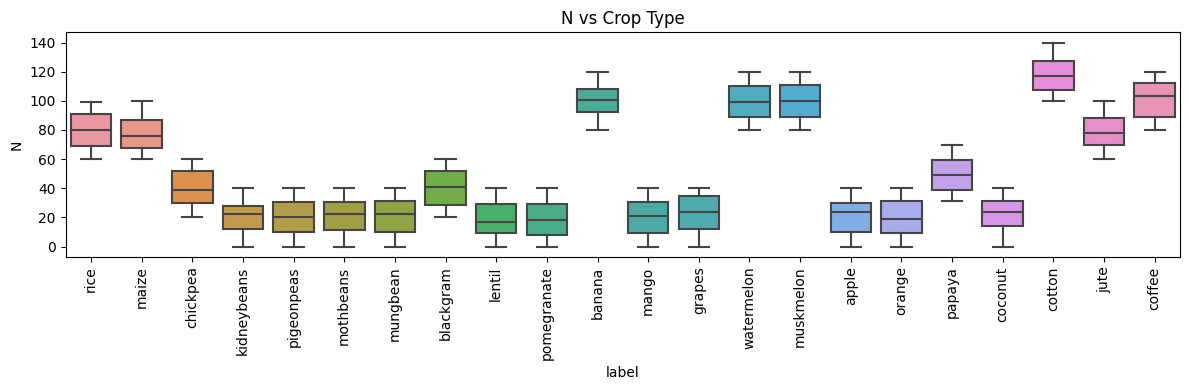

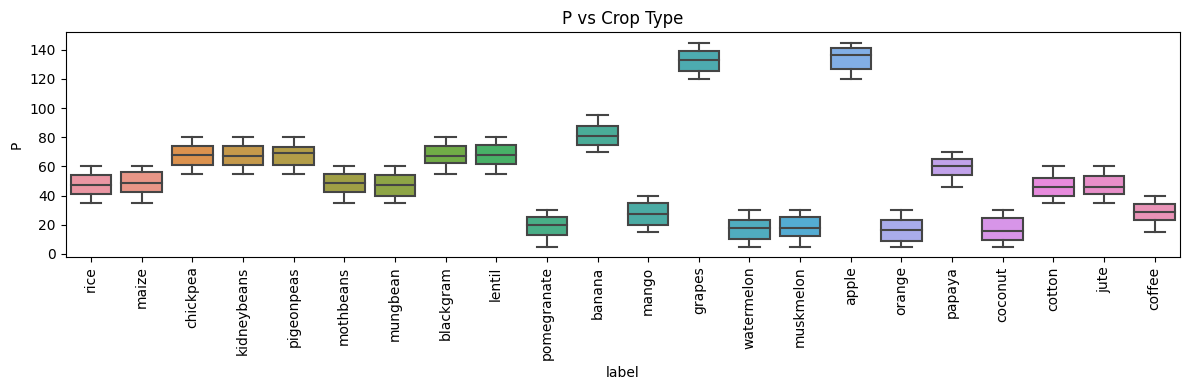

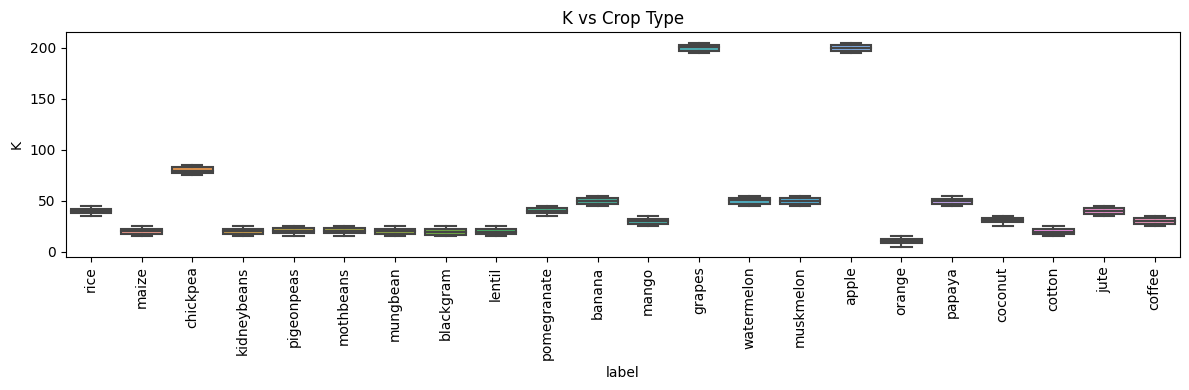

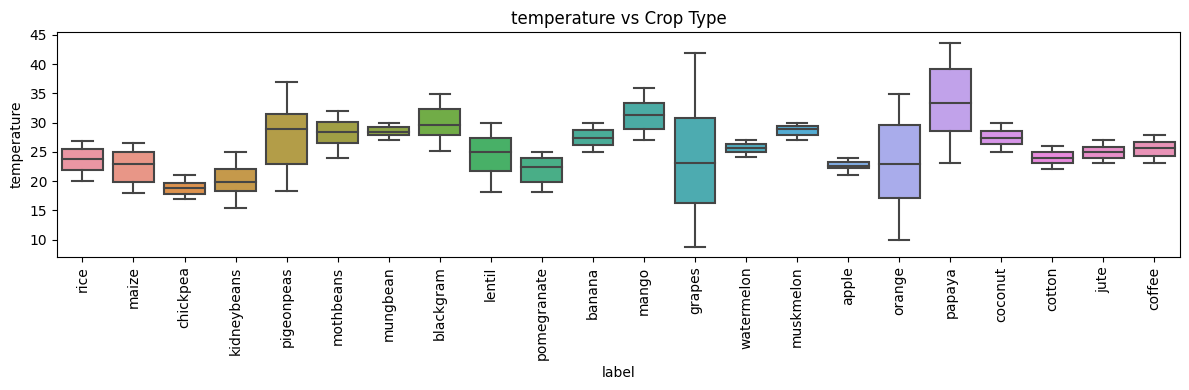

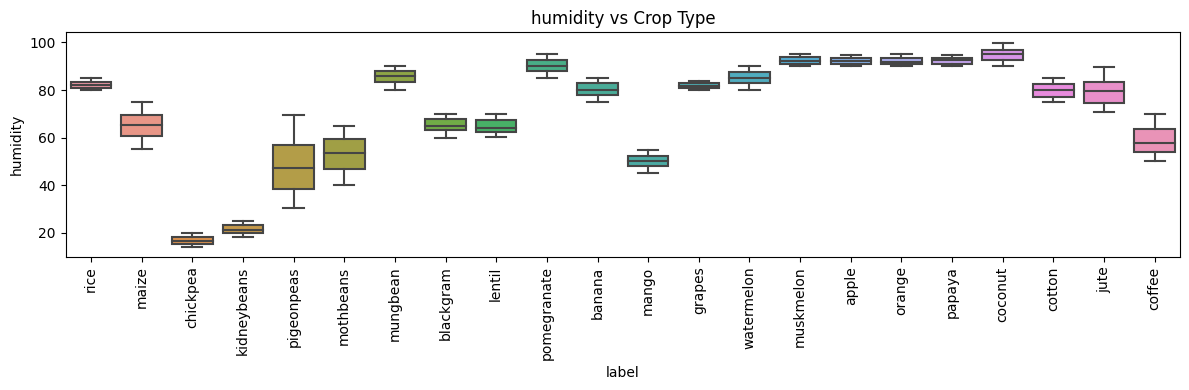

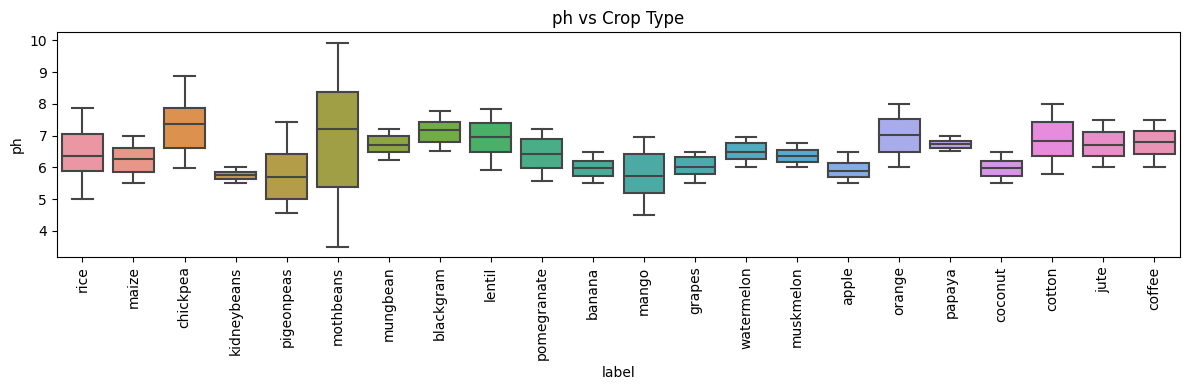

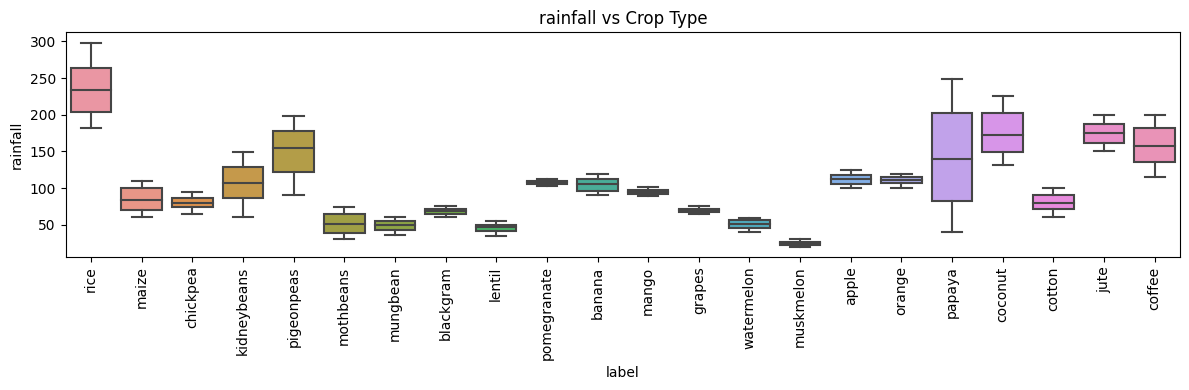

In [23]:
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
for feature in features:
    plt.figure(figsize=(12, 4))
    sns.boxplot(x='label', y=feature, data=data)
    plt.xticks(rotation=90)
    plt.title(f'{feature} vs Crop Type')
    plt.tight_layout()
    plt.show()


✅ Decision Tree Accuracy: 0.87


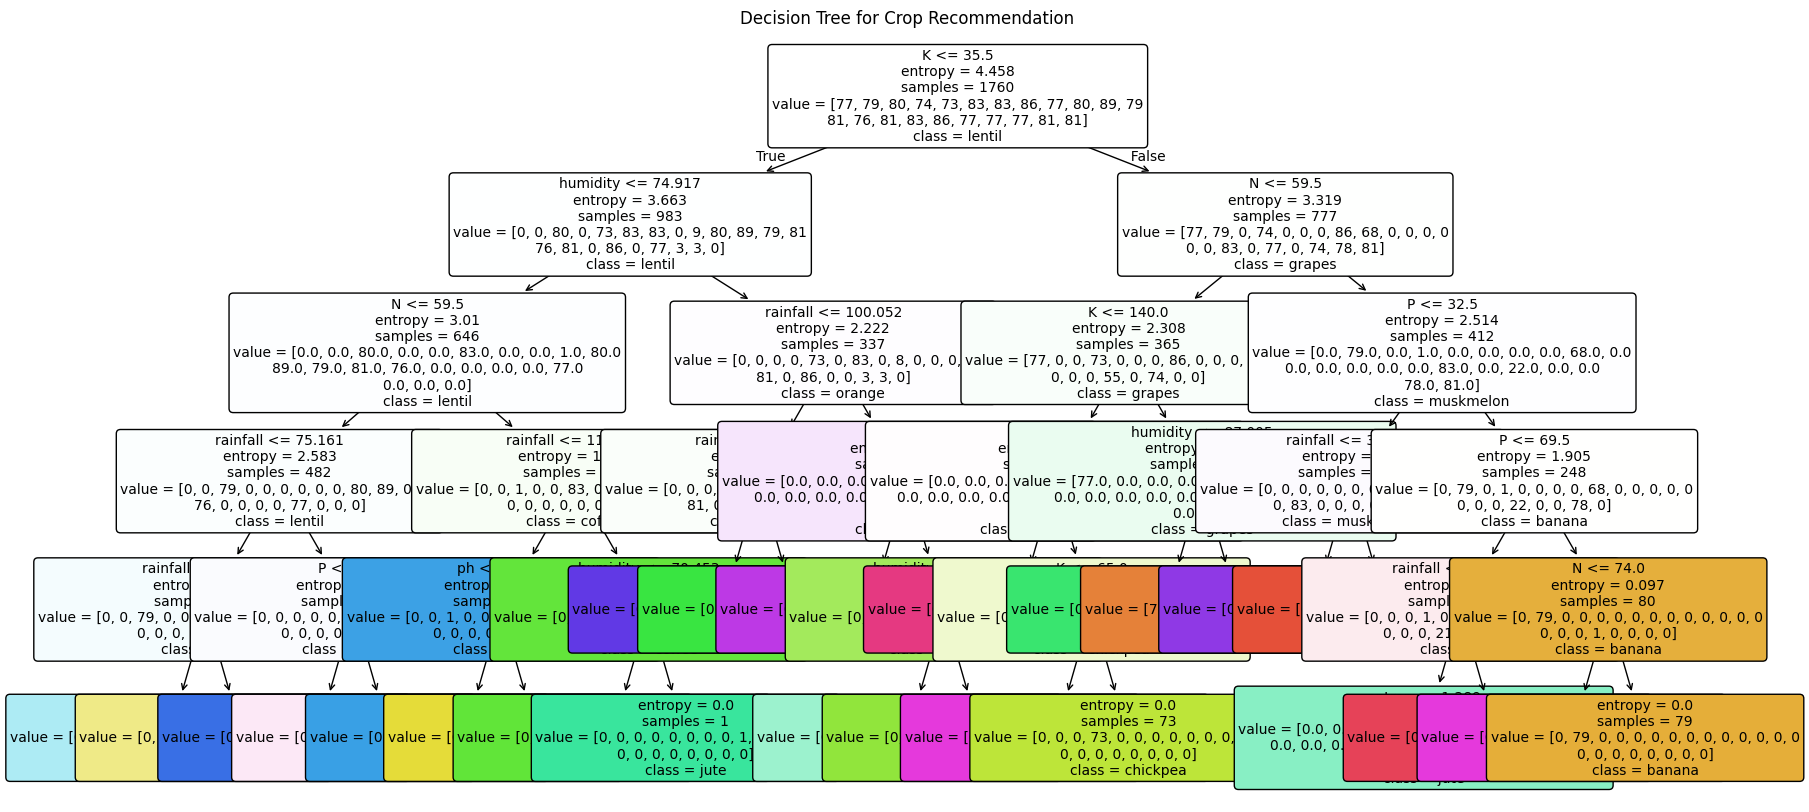

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# 🎯 Features and Target
X = data.drop('label', axis=1)
y = data['label']

# 🔠 Encoding the Crop Labels (strings to numbers)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 📊 Split into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# 🌲 Train the Decision Tree Classifier
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
dtree.fit(X_train, y_train)

# 🧪 Predictions and Evaluation
y_pred = dtree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Decision Tree Accuracy: {accuracy:.2f}")

# 🌳 Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(dtree, 
          feature_names=X.columns, 
          class_names=le.classes_, 
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.title("Decision Tree for Crop Recommendation")
plt.show()
